# Generate figures and summary tables for final reports

In [1]:
# Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import os

In [2]:
!pwd

/Users/ktregier/Documents/Repositories/AudioLanguageClassifer/notebooks


In [5]:
DATA_PATH = '../data/'
DATA_PROCESS_PATH = DATA_PATH + 'processed/'
FIG_PATH = '../reports/figures/'

In [6]:
metapath = DATA_PROCESS_PATH + 'processed.csv'
meta = pd.read_csv(metapath, index_col='speakerid')
meta.shape

(2134, 8)

In [7]:
meta.head()

,age,age_onset,birthplace,filename,native_language,sex,country,file_missing?
speakerid,,,,,,,,
1,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,south africa,False
2,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,south africa,False
3,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,ivory coast,False
4,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,kosovo,False
5,33.0,15.0,"tirana, albania",albanian2,albanian,male,albania,False


In [16]:
meta['Native Language'] = meta['native_language'].str.capitalize()
meta['Gender'] = meta['sex'].str.capitalize()
meta['Country'] = meta['country'].str.capitalize()

# General summary figures

In [9]:
lang_list = ['spanish', 'arabic', 'mandarin', 'french', 'korean', 'russian', 
             'portuguese', 'dutch', 'turkish', 'german']
top_lang = meta.loc[meta.native_language.isin(lang_list)]
top_lang['Native Language'] = top_lang['native_language'].str.capitalize()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


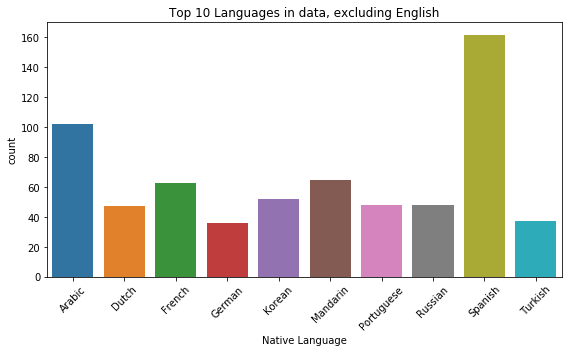

In [10]:
fig = plt.subplots(1, 1, figsize=(8, 5))
sns.countplot(x='Native Language', data=top_lang)
plt.title('Top 10 Languages in data, excluding English')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('{}TopLangCount.png'.format(FIG_PATH))

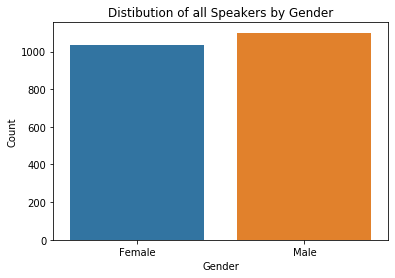

In [13]:
sns.countplot(x='Gender', data=meta)
plt.title('Distibution of all Speakers by Gender')
plt.ylabel('Count')
#plt.xlabel('Gender')
plt.savefig('{}GenderDistAll.png'.format(FIG_PATH))

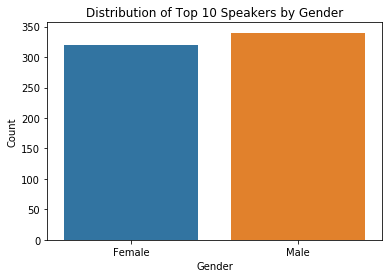

In [15]:
sns.countplot(x='Gender', data=top_lang)
plt.title('Distribution of Top 10 Speakers by Gender')
plt.ylabel('Count')
plt.savefig('{}GenderDistTop.png'.format(FIG_PATH))

In [18]:
english = meta.loc[meta.native_language == 'english']

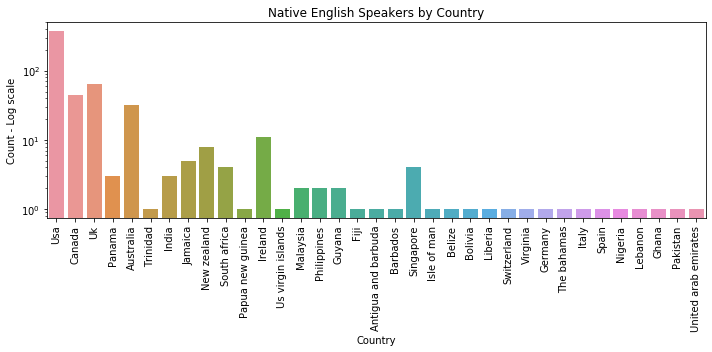

In [24]:
fig = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x='Country', data=english)
plt.yscale('log')
plt.ylabel('Count - Log scale')
plt.xticks(rotation=90)
plt.title('Native English Speakers by Country')
plt.tight_layout()
plt.savefig('{}EnglishCountry.png'.format(FIG_PATH))

# Gender classifier summaries

In [3]:
gen = pd.read_csv('gen_data_split_summary.csv' )#, index_col=['dataset', 'gender'])
gen['dataset'] = gen['dataset'].str.capitalize()
gen.rename({'gender':'Gender', 'dataset':'Data split'}, inplace=True, axis=1)
gen

,Data split,Gender,n_speakers,%_speakers,n_segs,%_segs
0,Train,F,581,0.484167,2746,0.493707
1,Train,M,619,0.515833,2816,0.506293
2,Val,F,194,0.485000,898,0.484881
3,Val,M,206,0.515000,954,0.515119
4,Test,F,259,0.485019,596,0.494196
5,Test,M,275,0.514981,610,0.505804


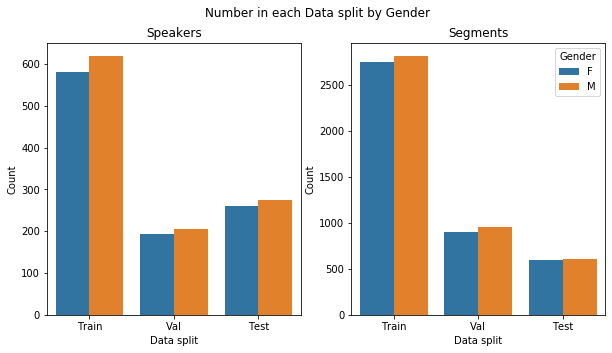

In [4]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')
axn[0].get_legend().remove()
#axn[0].set_xlabel('Data split')
#plt.savefig('Gen.SpeakerDatasetGender.png')

sns.barplot(x='Data split', y='n_segs', data=gen, hue='Gender', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')
#axn[1].set_xlabel('Data split')

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('Number in each Data split by Gender')
#plt.tight_layout()
plt.savefig('../Gen.NSegSpeakperDataset.png')

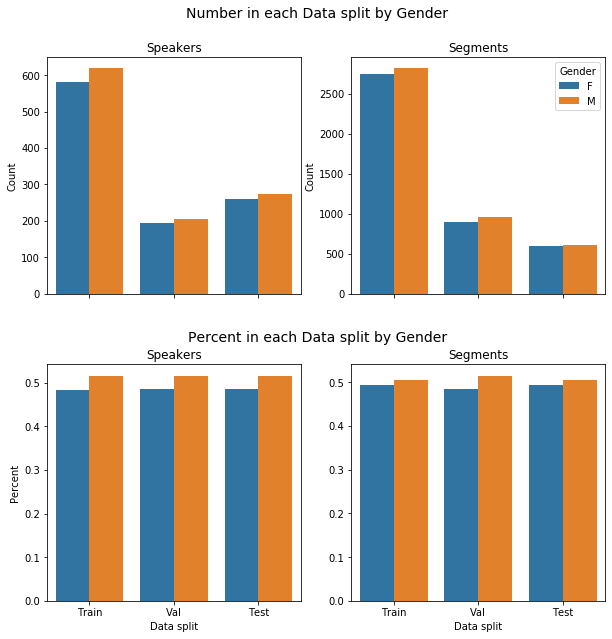

In [5]:
fig, axn = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0,0])
axn[0,0].set_title('Speakers')
axn[0,0].set_ylabel('Count')
axn[0,0].get_legend().remove()
axn[0,0].set_xlabel('')

sns.barplot(x='Data split', y='n_segs', data=gen, hue='Gender', ax=axn[0,1])
axn[0,1].set_title('Segments')
axn[0,1].set_ylabel('Count')
axn[0,1].set_xlabel('')

sns.barplot(x='Data split', y='%_speakers', data=gen, hue='Gender', ax=axn[1,0])
axn[1,0].set_title('Speakers')
axn[1,0].set_ylabel('Percent')
axn[1,0].get_legend().remove()

sns.barplot(x='Data split', y='%_segs', data=gen, hue='Gender', ax=axn[1,1])
axn[1,1].set_title('Segments')
axn[1,1].set_ylabel('')
axn[1,1].get_legend().remove()

plt.figtext(0.5,0.95, "Number in each Data split by Gender", ha="center", va="top", fontsize=14, color="k")
plt.figtext(0.5,0.5, "Percent in each Data split by Gender", ha="center", va="top", fontsize=14, color="k")
plt.subplots_adjust(hspace = 0.3 )

#plt.savefig('Gen.SegSpeakperDataset.png')

Text(0.5, 0.98, 'Number of each Gender by Data split')

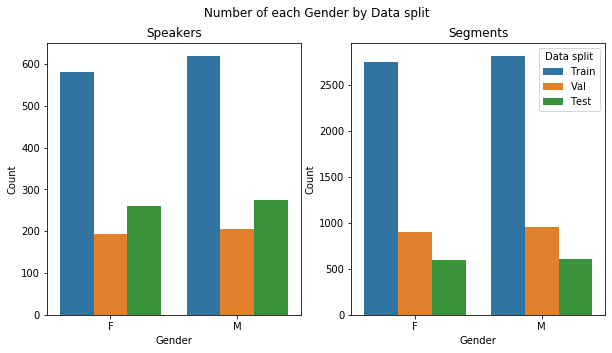

In [6]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='Gender', y='n_speakers', data=gen, hue='Data split', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')
axn[0].get_legend().remove()
#axn[0].set_xlabel('Gender')

sns.barplot(x='Gender', y='n_segs', data=gen, hue='Data split', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')
#axn[1].set_xlabel('Gender')

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('Number of each Gender by Data split')
#plt.tight_layout()
#plt.savefig('Gen.NSegSpeakperGender.png')

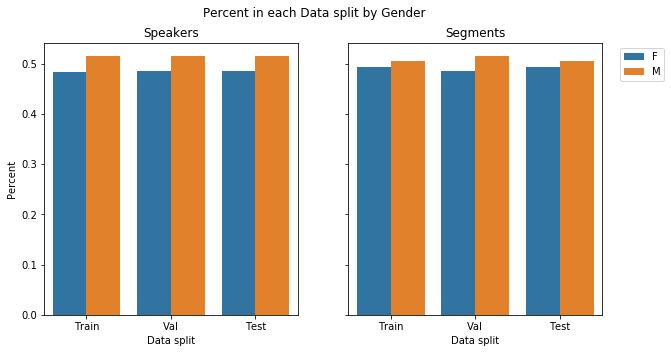

In [7]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x='Data split', y='%_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].set_xlabel('Data split')
axn[0].get_legend().remove()
#plt.savefig('Gen.PercentSpeakersGenderDataset.png')

sns.barplot(x='Data split', y='%_segs', data=gen, hue='Gender', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('')
axn[1].set_xlabel('Data split')

plt.suptitle('Percent in each Data split by Gender')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.tight_layout()
#plt.savefig('Gen.PercentSegSpeakDataset.png')

Text(0.5, 0.98, 'Percentage of each Gender by Data split')

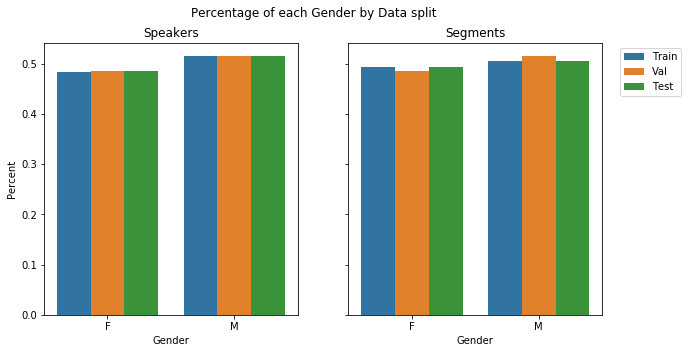

In [8]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x='Gender', y='%_speakers', data=gen, hue='Data split', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].get_legend().remove()
#axn[0].set_xlabel('Data split')
#plt.savefig('Gen.PercentSpeakersGenderDataset.png')

sns.barplot(x='Gender', y='%_segs', data=gen, hue='Data split', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('')
#axn[1].set_xlabel('Data split')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('Percentage of each Gender by Data split')
#plt.tight_layout()
#plt.savefig('Gen.PercentSegSpeakDataset.png')

In [9]:
gen_pct = gen[['Data split', 'Gender','%_speakers', '%_segs']]
gen_pct.head(6)

,Data split,Gender,%_speakers,%_segs
0,Train,F,0.484167,0.493707
1,Train,M,0.515833,0.506293
2,Val,F,0.485000,0.484881
3,Val,M,0.515000,0.515119
4,Test,F,0.485019,0.494196
5,Test,M,0.514981,0.505804


Text(0.5, 0.98, 'Percentage of speakers by gender per data split')

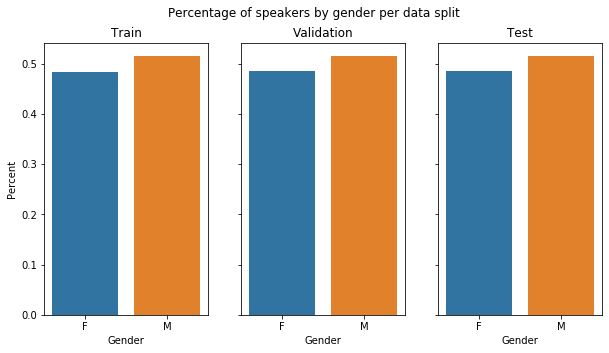

In [10]:
fig, axn = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
sns.barplot(data = gen_pct.loc[gen_pct['Data split']=='Train'], x='Gender', y='%_speakers', ax=axn[0])
axn[0].set_title('Train')
axn[0].set_xlabel('Gender')
axn[0].set_ylabel('Percent')

sns.barplot(data = gen_pct.loc[gen_pct['Data split']=='Val'], x='Gender', y='%_speakers', ax=axn[1])
axn[1].set_title('Validation')
axn[1].set_xlabel('Gender')
axn[1].set_ylabel('')

sns.barplot(data = gen_pct.loc[gen_pct['Data split']=='Test'], x='Gender', y='%_speakers', ax=axn[2])
axn[2].set_title('Test')
axn[2].set_xlabel('Gender')
axn[2].set_ylabel('')

plt.suptitle('Percentage of speakers by gender per data split')
#plt.tight_layout()

# Language classifier summaries

In [48]:
lang = pd.read_csv('../data/language/data_split_sum.csv', index_col=['Unnamed: 0'])

In [49]:
lang.rename({'index':'Language', 'dataset':'Data split'}, inplace=True, axis=1)
lang.Language = lang.Language.str.capitalize()
lang['Data split'] = lang['Data split'].str.capitalize()
lang['L'] = [x[0] for x in lang.Language]
#lang['%_seg'] = lang['%_seg']*100
#lang['%_sp'] = lang['%_sp']*100
lang.sort_values(by = ['L'], inplace=True)
lang.head()

,Language,Data split,n_seg,n_sp,L
0,Arabic,Train,234,42,A
22,Arabic,Test,58,19,A
11,Arabic,Val,88,14,A
30,Dutch,Test,26,12,D
19,Dutch,Val,36,9,D


In [50]:
by_data = lang.groupby('Data split').sum()
by_data.reset_index(inplace=True)
by_data.head()

,Data split,n_seg,n_sp
0,Test,373,158
1,Train,1606,346
2,Val,536,117


In [51]:
NUM_SP_TRAIN = 346
NUM_SP_VAL = 117
NUM_SP_TEST = 158

NUM_SP_TOTAL = NUM_SP_TRAIN + NUM_SP_VAL + NUM_SP_TEST
print("Total number of speakers: ", NUM_SP_TOTAL)

NUM_SEG_TRAIN = 1606 #1529
NUM_SEG_VAL = 536 #512
NUM_SEG_TEST = 373

NUM_SEG_TOTAL = NUM_SEG_TRAIN + NUM_SEG_VAL + NUM_SEG_TEST
print("Total number of segments: ", NUM_SEG_TOTAL)

Total number of speakers:  621
Total number of segments:  2515


In [62]:
lang['%_sp_total'] = lang['n_sp']/NUM_SP_TOTAL * 100
lang['%_seg_total'] = lang['n_seg']/NUM_SEG_TOTAL * 100

lang.head()

,Language,Data split,n_seg,n_sp,L,%_sp_total,%_seg_total
0,Arabic,Train,234,42,A,6.763285,9.304175
22,Arabic,Test,58,19,A,3.059581,2.306163
11,Arabic,Val,88,14,A,2.254428,3.499006
30,Dutch,Test,26,12,D,1.932367,1.033797
19,Dutch,Val,36,9,D,1.449275,1.431412


In [60]:
# Sanity check
# N arabic speakers in training set over all training speaker
print("% sp train:" , 42 / 346)
# N arabic speakers in training set over all speakers
print("% sp total:" , 42/ NUM_SP_TOTAL *100)
# N arabic segments in training set over all training segments
print("% seg train:" , 234 / 1606) 
# N arabic segments in training set over all segments
print("% seg total:" , 234 / NUM_SEG_TOTAL *100)

% sp train: 0.12138728323699421
% sp total: 6.763285024154589
% seg train: 0.14570361145703611
% seg total: 9.304174950298211


Text(0.5, 0.98, 'Number per data split')

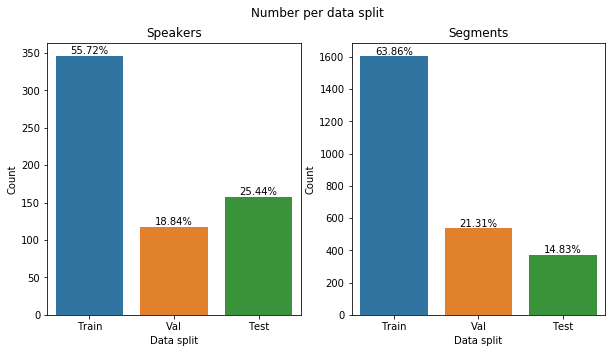

In [54]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_sp', data=by_data, ax=axn[0], order=['Train', 'Val', 'Test'])

for p in axn[0].patches:
    height = p.get_height()
    axn[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/NUM_SP_TOTAL * 100),
            ha="center")     
    
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')
#axn[0].set_xlabel('Data split')

sns.barplot(x='Data split', y='n_seg', data=by_data, ax=axn[1], order=['Train', 'Val', 'Test'])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')

for p in axn[1].patches:
    height = p.get_height()
    axn[1].text(p.get_x()+p.get_width()/2.,
            height+10,
            '{:1.2f}%'.format(height/NUM_SEG_TOTAL * 100),
            ha="center") 

plt.suptitle('Number per data split')
#plt.tight_layout()

#plt.savefig('Lang.NSegSpeakbyDataset.png')

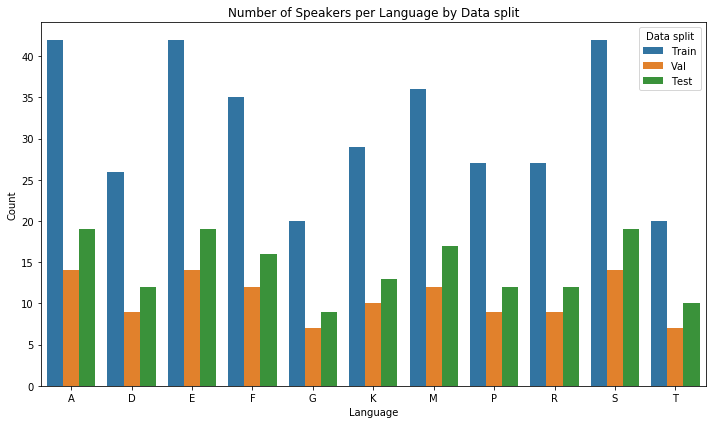

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='n_sp', data=lang, hue='Data split', hue_order=['Train', 'Val', 'Test'])
plt.title('Number of Speakers per Language by Data split')
#plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Language')
plt.tight_layout()
#plt.savefig('Lang.SpeakerDatasetbyLang.png')

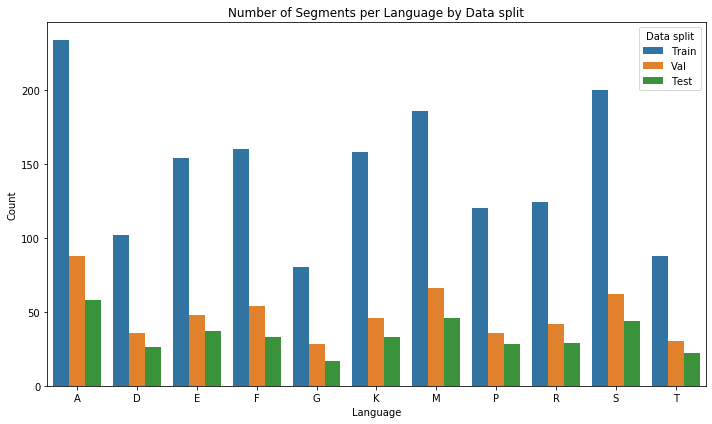

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='n_seg', data=lang, hue='Data split', hue_order=['Train', 'Val', 'Test'])
plt.title('Number of Segments per Language by Data split')
plt.ylabel('Count')
plt.xlabel('Language')
plt.tight_layout()
#plt.savefig('Lang.SegmentDatasetbyLang.png')

In [22]:
by_lang = lang.groupby('Language').sum()
by_lang.reset_index(inplace=True)
by_lang['%_sp_total'] = by_lang['%_sp_total']*100
by_lang['%_seg_total'] = by_lang['%_seg_total']*100
by_lang['L'] = [x[0] for x in by_lang.Language]
by_lang.rename({'%_sp_total': 'Speakers', '%_seg_total': 'Segments'}, inplace=True, axis=1)

by_lang.set_index('L', inplace=True)
by_lang

,Language,N_sp,N_seg,%_seg,%_sp,Speakers,Segments
L,,,,,,,
A,Arabic,75,380,48.041218,36.129857,12.077295,15.741508
D,Dutch,47,164,20.672786,22.801695,7.568438,6.793703
E,English,75,138,19.643042,36.129857,12.077295,5.716653
F,French,63,247,29.858416,30.498599,10.144928,10.231980
G,German,36,125,15.258569,17.459455,5.797101,5.178128
K,Korean,52,237,28.165111,25.156360,8.373591,9.817730
M,Mandarin,65,298,37.387878,31.420528,10.466989,12.344656
P,Portuguese,48,184,22.386219,23.090713,7.729469,7.622204
R,Russian,48,195,24.087800,23.090713,7.729469,8.077879


ValueError: Could not interpret input '%_sp'

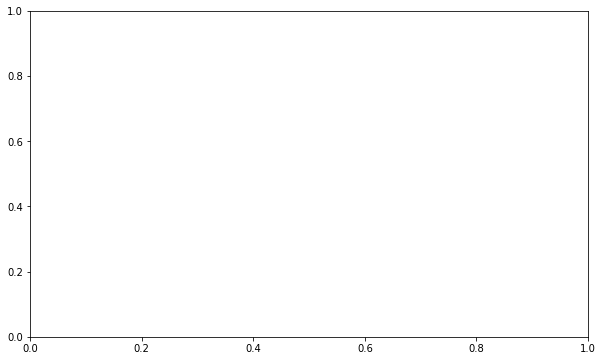

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='%_sp', data=lang, hue='Data split')
plt.title('Percentage of Speakers per Data split')
#plt.xticks(rotation=45)
plt.xlabel('Language')
plt.tight_layout()
#plt.savefig('Lang.Speaker%DatasetbyLang.png')

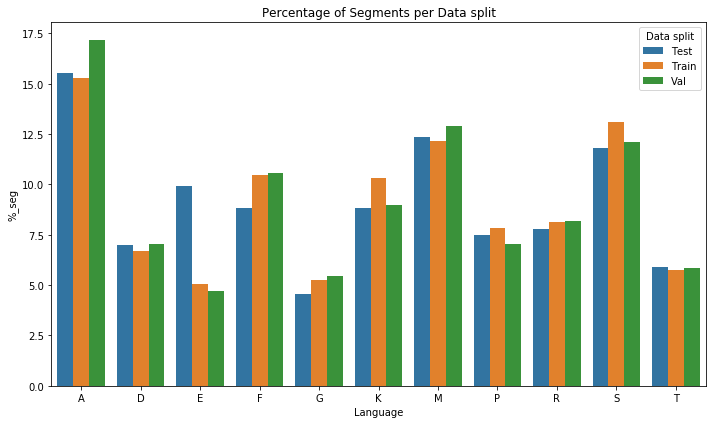

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='%_seg', data=lang, hue='Data split')
plt.title('Percentage of Segments per Data split')
plt.xlabel('Language')
#plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('Lang.Seg%DatasetbyLang.png')

In [23]:
by_lang.describe()

,N_sp,N_seg,%_seg,%_sp,Speakers,Segments
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,56.454545,219.454545,27.272727,27.272727,9.090909,9.090909
std,14.821361,82.037020,10.054178,7.092134,2.386693,3.398385
min,36.000000,125.000000,15.258569,17.459455,5.797101,5.178128
25%,47.500000,152.000000,20.157914,22.946204,7.648953,6.296603
50%,52.000000,195.000000,24.087800,25.156360,8.373591,8.077879
75%,70.000000,272.500000,33.422241,33.775192,11.272142,11.288318
max,75.000000,380.000000,48.041218,36.129857,12.077295,15.741508


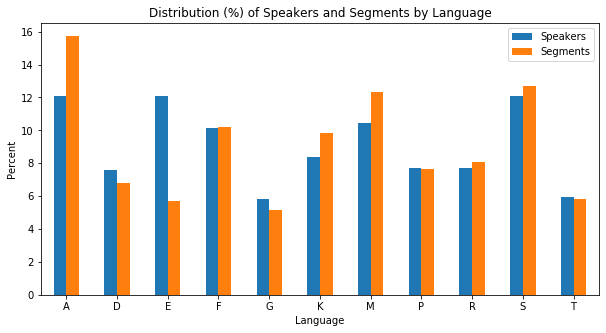

In [24]:
by_lang[['Speakers', 'Segments']].plot.bar(figsize=(10, 5))
plt.xlabel('Language')
plt.title('Distribution (%) of Speakers and Segments by Language')
plt.ylabel('Percent')
plt.xticks(rotation="horizontal")
plt.savefig('../Lang.DistPercentSpSeg.png')

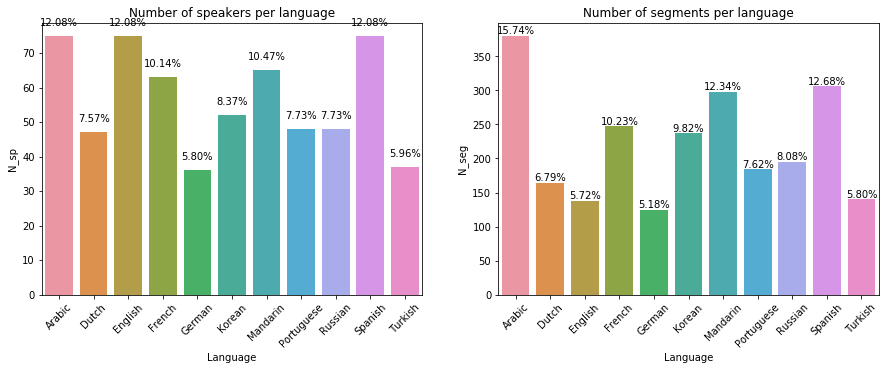

In [25]:
fig, axn = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Language', y='N_sp', data=by_lang, ax=axn[0] ) #, order=['train', 'val', 'test'])
axn[0].set_title('Number of speakers per language')
axn[0].set_xticklabels(by_lang.Language, rotation=45)


for p in axn[0].patches:
    height = p.get_height()
    axn[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/NUM_SP_TOTAL * 100),
            ha="center")  

sns.barplot(x='Language', y='N_seg', data=by_lang, ax=axn[1] ) #, order=['train', 'val', 'test'])
axn[1].set_title('Number of segments per language')
axn[1].set_xticklabels(by_lang.Language, rotation=45)

for p in axn[1].patches:
    height = p.get_height()
    axn[1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/NUM_SEG_TOTAL * 100),
            ha="center")  

#plt.savefig('Lang.NSegSpeakbyLang.png')

In [26]:
lang_seg_pivot_pct= lang.pivot(index='Language',
                   columns='Data split',
                   values=['%_seg'])
lang_sp_pivot_pct= lang.pivot(index='Language',
                   columns='Data split',
                   values=[ '%_sp'])

Text(0.5, 0.98, 'Percentage of speakers by language per data split')

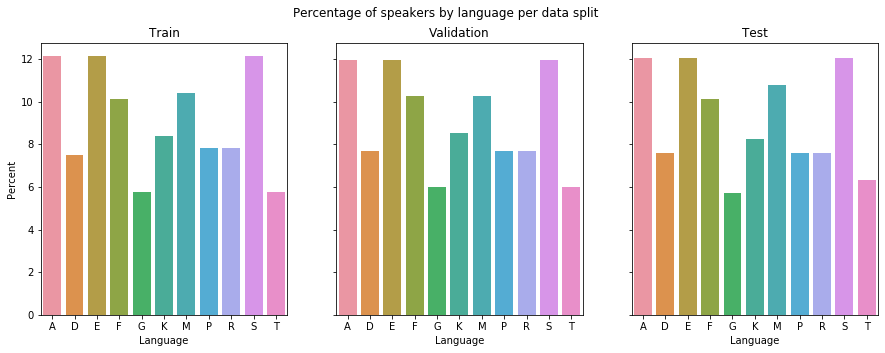

In [27]:
# Plot number of speakers per language per data split  
fig, axn = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(data = lang.loc[lang['Data split']=='Train'], x='L', y='%_sp', ax=axn[0])
axn[0].set_title('Train')
axn[0].set_xlabel('Language')
axn[0].set_ylabel('Percent')

sns.barplot(data = lang.loc[lang['Data split']=='Val'], x='L', y='%_sp', ax=axn[1])
axn[1].set_title('Validation')
axn[1].set_xlabel('Language')
axn[1].set_ylabel('')

sns.barplot(data = lang.loc[lang['Data split']=='Test'], x='L', y='%_sp', ax=axn[2])
axn[2].set_title('Test')
axn[2].set_xlabel('Language')
axn[2].set_ylabel('')

plt.suptitle('Percentage of speakers by language per data split')
#plt.tight_layout()

Text(0.5, 0.98, 'Percentage of segments by language per data split')

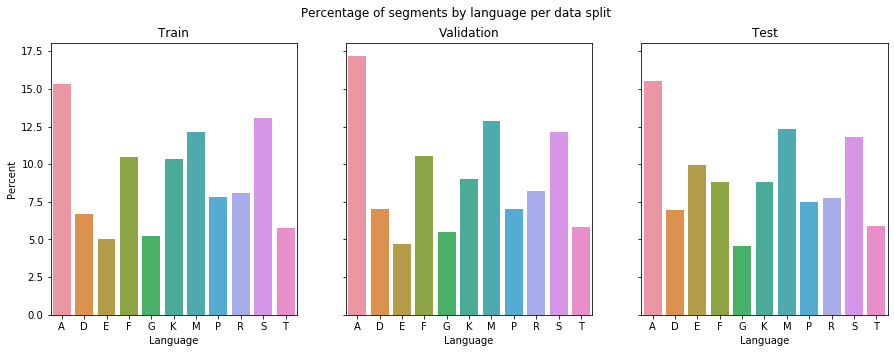

In [28]:
# Plot number of speakers per language per data split  
fig, axn = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(data = lang.loc[lang['Data split']=='Train'], x='L', y='%_seg', ax=axn[0])
axn[0].set_title('Train')
axn[0].set_xlabel('Language')
axn[0].set_ylabel('Percent')

sns.barplot(data = lang.loc[lang['Data split']=='Val'], x='L', y='%_seg', ax=axn[1])
axn[1].set_title('Validation')
axn[1].set_xlabel('Language')
axn[1].set_ylabel('')

sns.barplot(data = lang.loc[lang['Data split']=='Test'], x='L', y='%_seg', ax=axn[2])
axn[2].set_title('Test')
axn[2].set_xlabel('Language')
axn[2].set_ylabel('')

plt.suptitle('Percentage of segments by language per data split')
#plt.tight_layout()

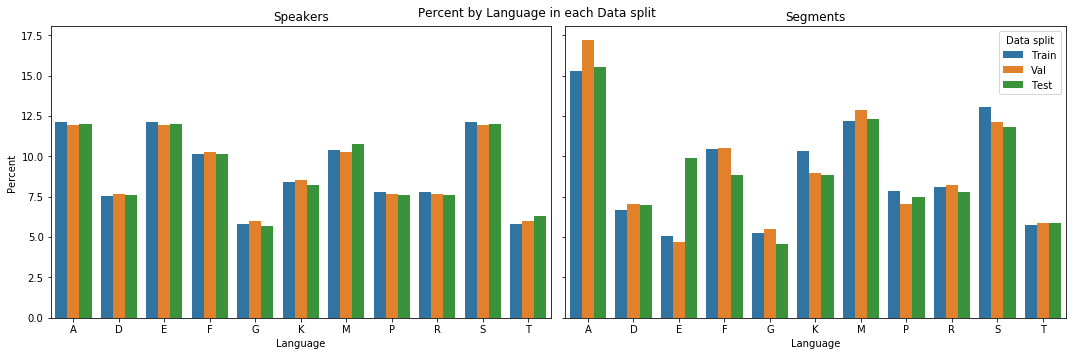

In [29]:
fig, axn = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(data = lang, x='L', y='%_sp', hue='Data split', ax=axn[0], hue_order=['Train', 'Val', 'Test'])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].set_xlabel('Language')
axn[0].get_legend().remove()

sns.barplot(data = lang, x='L', y='%_seg', hue='Data split', ax=axn[1], hue_order=['Train', 'Val', 'Test'])
axn[1].set_title('Segments')
axn[1].set_ylabel('')
axn[1].set_xlabel('Language')

plt.suptitle("Percent by Language in each Data split")
plt.tight_layout()
plt.savefig('../PctSpSegbyLangperSplit.png')

In [30]:
conf_mat = [
    [ 0, 6,  3,  1,  0,  3,  0,  2,  1,  4,  8],
    [ 0,28,  1,  0,  1, 10,  1,  0,  2,  0, 12],
    [ 0, 3,  1,  0,  0,  4,  5,  1,  2,  1,  4],
    [ 0,12,  0,  2,  0,  6,  1,  1,  2,  2,  5],
    [ 0, 2,  0,  1,  0,  1,  4,  1,  4,  2,  0],
    [ 0, 1,  0,  0,  0, 17,  1,  0,  2,  2,  2],
    [ 2, 7,  0,  1,  4,  3,  6,  4,  6,  2,  7],
    [ 0, 9,  0,  0,  0,  4,  4,  3,  0,  6,  6],
    [ 0, 2,  0,  1,  0,  6,  1,  5,  9,  0,  6],
    [ 0, 8,  1,  0,  1,  2,  1,  7,  2,  1,  5],
    [ 1, 2,  3,  2,  0,  5,  3,  3,  2,  6, 18]]

In [31]:
row_sum = [sum(i) for i in conf_mat]
print(row_sum)

[28, 55, 21, 31, 15, 25, 42, 32, 30, 28, 45]


In [32]:
def colsum(arr, n, m): 
    for i in range(n): 
        su = 0; 
        for j in range(m): 
            su += arr[j][i] 
        print(su, end = " ")     

In [33]:
col_sum = colsum(conf_mat, len(conf_mat[0]), len(conf_mat)) 

print(col_sum)

3 80 9 8 6 61 27 27 32 26 73 None


# Figures for the presentation
based on putting together the presentation

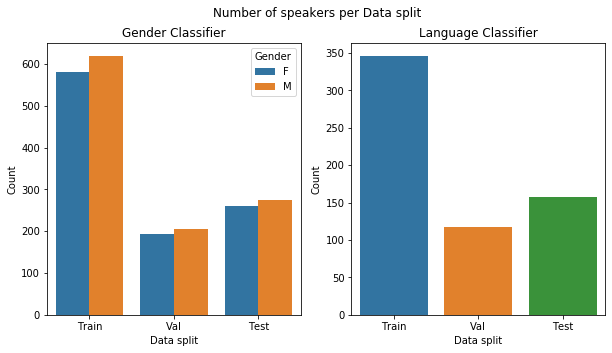

In [34]:
# Side by side
# Gender N_speakers per data split; Lang N_speaker per data split

fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Gender Classifier')
axn[0].set_ylabel('Count')

sns.barplot(x='Data split', y='N_sp', data=by_data, ax=axn[1], order=['Train', 'Val', 'Test'])
axn[1].set_title('Language Classifier')
axn[1].set_ylabel('Count')

plt.suptitle('Number of speakers per Data split')
plt.savefig('../Both_NSpeakSplit.png')

In [35]:
#Waveform of english and Arabic soundfiles, 
#Add red lines at segments
SR = 16000

In [36]:
eng_path = '../data/original/recordings/recordings/english11.mp3'
eng, sr = librosa.load(eng_path, SR)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [37]:
arb_path = '../data/original/recordings/recordings/arabic24.mp3'
arb , sr= librosa.load(arb_path, SR)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


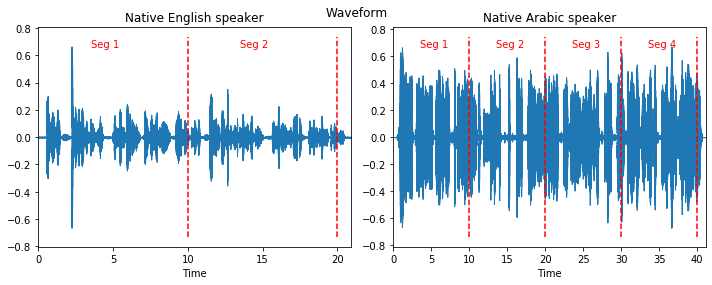

In [38]:
fig, axn = plt.subplots(1, 2, figsize=(10,4))

librosa.display.waveplot(eng, sr=SR, ax=axn[0])
axn[0].set_title('Native English speaker')
y_min, y_max = axn[0].get_ylim()
axn[0].vlines(10, y_min, y_max, linestyles='dashed',colors='r')
axn[0].vlines(20, y_min, y_max, linestyles='dashed',colors='r')
axn[0].text(3.5, y_max*.9, 'Seg 1', c='r')
axn[0].text(13.5, y_max*.9, 'Seg 2', c='r')

librosa.display.waveplot(arb, sr=SR, ax=axn[1])
axn[1].set_title('Native Arabic speaker')

y_min, y_max = axn[1].get_ylim()
axn[1].vlines(10, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(20, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(30, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(40, y_min, y_max, linestyles='dashed',colors='r')
axn[1].text(3.5, y_max*.9, 'Seg 1', c='r')
axn[1].text(13.5, y_max*.9, 'Seg 2', c='r')
axn[1].text(23.5, y_max*.9, 'Seg 3', c='r')
axn[1].text(33.5, y_max*.9, 'Seg 4', c='r')

plt.suptitle('Waveform')
plt.tight_layout()
plt.savefig('../Waveforms.png')

In [39]:
# Segment audio file to convert to .wav, for mel spect.
def segment_10s(audio, sr):
    seg_files ={}
    n_seg = int((len(audio)/sr)/10)
    for i in range(n_seg):
        segment = audio[10*i*sr:(i+1)*10*sr]
        seg_files[i] = segment
    return seg_files

In [40]:
eng_seg = segment_10s(eng, SR)
eng_seg.keys()

dict_keys([0, 1])

In [41]:
# Add noise to English file
def add_noise(audio):
    rng = np.random.default_rng()
    noise = rng.standard_normal(len(audio))
    noisy_seg = audio + 0.005*noise
    return noisy_seg

eng_noise = add_noise(eng_seg[0])

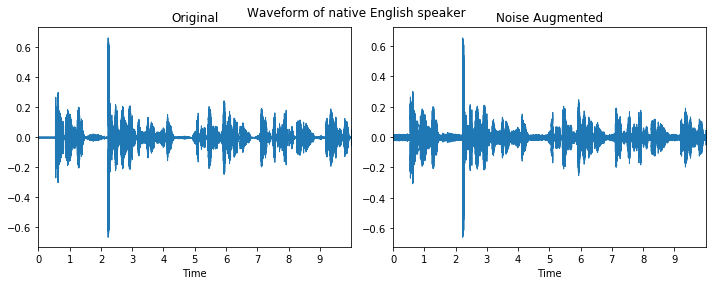

In [47]:
fig, axn = plt.subplots(1, 2, figsize=(10,4))

librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0])
axn[0].set_title('Original')


librosa.display.waveplot(eng_noise, sr=SR, ax=axn[1])
axn[1].set_title('Noise Augmented')

plt.suptitle('Waveform of native English speaker')
plt.tight_layout()
plt.savefig('../OrigNoise.png')

## Plot spectrogram examples

In [43]:
# Mel spectrogram parameters
N_MEL_BANDS = 64
FREQ_MIN = 125
FREQ_MAX = 7500
HOP = 1667
WIN = 400
FFT = 512

In [44]:
mel_spec = librosa.feature.melspectrogram(eng_seg[0], SR, n_mels=N_MEL_BANDS, 
                                     fmin=FREQ_MIN, fmax=FREQ_MAX,
                                     hop_length=HOP, n_fft=FFT)

mel_db = librosa.power_to_db(mel_spec, ref=np.max)

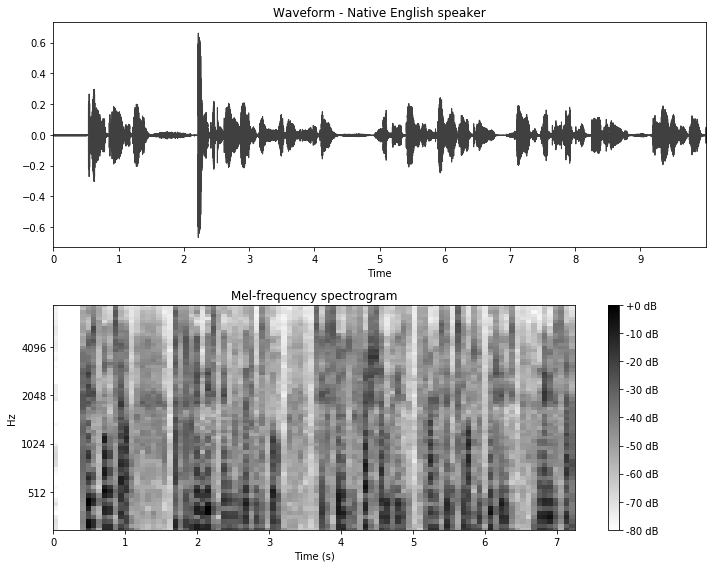

In [45]:
fig, axn = plt.subplots(2, 1, figsize=(10, 8))
librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0], color='0.25')
axn[0].set(title='Waveform - Native English speaker')
 
#mel_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_db, x_axis='s', y_axis='mel', 
                               ax=axn[1], fmin=FREQ_MIN, fmax=FREQ_MAX,
                               cmap='gray_r', hop_length=HOP)
fig.colorbar(img, ax=axn[1], format='%+2.0f dB')
axn[1].set(title="Mel-frequency spectrogram")
plt.tight_layout()
#plt.savefig('EnglishMelSpec.png')

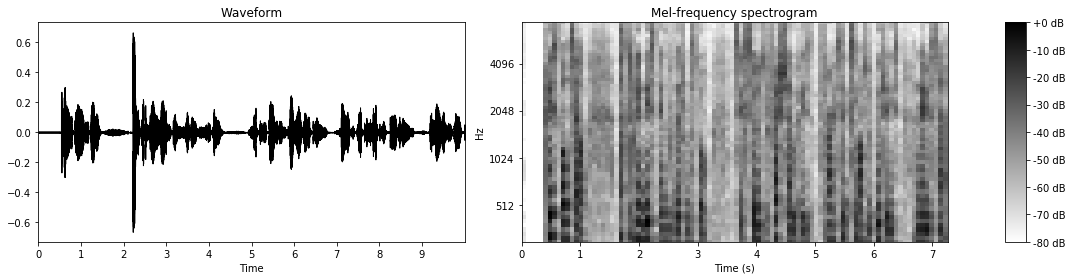

In [46]:
fig, axn = plt.subplots(1, 3, figsize=(15,4), gridspec_kw={
                           'width_ratios': [1, 1, 0.05]})
librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0], color='k')#0.25')
axn[0].set(title='Waveform')
 
#mel_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_db, x_axis='s', y_axis='mel', 
                               ax=axn[1], fmin=FREQ_MIN, fmax=FREQ_MAX,
                               cmap='gray_r', hop_length=HOP)
axn[1].set(title="Mel-frequency spectrogram")
    
fig.colorbar(img, cax=axn[2], format='%+2.0f dB')  
plt.tight_layout()
plt.savefig('../English11MelSpec.png')